<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiments/GAN_Experiment_Final_LoRaWAN_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
DATASET_PATH = 'machine2_with_noise_24_features.csv'
IMP_COL = [	'XOAVelocity',	'XPeakmg',	'XRMSmg',	'XKurtosis',	'XCrestFactor',	'XSkewness'	,'XDeviation',	'XPeaktoPeakDisplacement',
           'YOAVelocity',	'YPeakmg',	'YRMSmg',	'YKurtosis',	'YCrestFactor',	'YSkewness'	,'YDeviation',	'YPeaktoPeakDisplacement',
           'ZOAVelocity',	'ZPeakmg',	'ZRMSmg',	'ZKurtosis',	'ZCrestFactor',	'ZSkewness'	,'ZDeviation',	'ZPeaktoPeakDisplacement',
           'converted', 'target']
TAR_COL = 'target'

In [ ]:
df = pd.read_csv(DATASET_PATH)[IMP_COL]
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement,converted,target
0,7,18,13,-5,38,-4,8,1,8,11,...,20,156,111,0,0,0,0,0,2022-12-12 05:13,0
1,67,183,130,22,197,8,531,6,38,137,...,85,390,276,0,0,0,0,0,2022-12-12 05:19,0
2,20,48,34,-3,203,1,204,2,18,36,...,63,216,153,0,0,0,0,0,2022-12-12 05:19,0
3,218,305,216,-36,132,-5,291,23,232,306,...,132,117,83,0,0,0,0,0,2022-12-12 05:19,0
4,9,18,13,3,1039,-1,8,1,9,12,...,16,107,76,0,0,0,0,0,2022-12-12 05:43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,58,91,65,-15,925,-1,26,4,58,77,...,157,871,616,0,0,0,0,0,2023-05-04 04:43,0
3842,30,76,54,-5,1201,0,373,3,36,72,...,101,265,188,0,0,0,0,0,2023-05-04 04:48,0
3843,63,169,120,512,3043,5,583,8,186,422,...,188,405,287,0,0,0,0,0,2023-05-04 04:50,0
3844,170,162,115,68,936,0,227,22,265,214,...,460,237,168,0,0,0,0,0,2023-05-04 04:50,0


In [ ]:
df = df. sort_values(by=["converted"])
df = df.reset_index(drop=True)

df = df.drop(['converted'], axis=1)
df['target2'] = df['target'].apply(lambda x: 1 if x == 0 else 0)
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement,target,target2
0,8,14,10,-12,2400,0,7,1,8,11,...,17,83,59,0,0,0,0,0,1,0
1,8,14,10,-12,2400,0,7,1,8,11,...,17,83,59,0,0,0,0,0,1,0
2,8,14,10,-12,2400,0,7,1,8,11,...,17,83,59,0,0,0,0,0,1,0
3,221,147,104,82,119,-11,334,23,261,179,...,64,91,65,0,0,0,0,0,1,0
4,88,231,164,33,17,-1,518,9,55,165,...,139,725,513,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,58,91,65,-15,925,-1,26,4,58,77,...,157,871,616,0,0,0,0,0,0,1
3842,30,76,54,-5,1201,0,373,3,36,72,...,101,265,188,0,0,0,0,0,0,1
3843,170,162,115,68,936,0,227,22,265,214,...,460,237,168,0,0,0,0,0,0,1
3844,63,169,120,512,3043,5,583,8,186,422,...,188,405,287,0,0,0,0,0,0,1


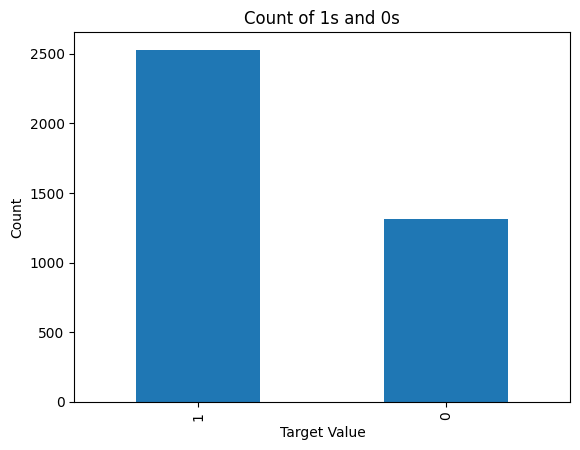

1    2529
0    1317
Name: target, dtype: int64


In [ ]:
target_counts = df['target'].value_counts()

# Create a bar chart of the counts
target_counts.plot.bar()

# Add labels and title to the chart
plt.title('Count of 1s and 0s')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Display the chart
plt.show()
print(target_counts)

C:\Users\Avishka\AppData\Local\Temp\ipykernel_13780\668177770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.target -= 1
C:\Users\Avishka\AppData\Local\Temp\ipykernel_13780\668177770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.target *= 40


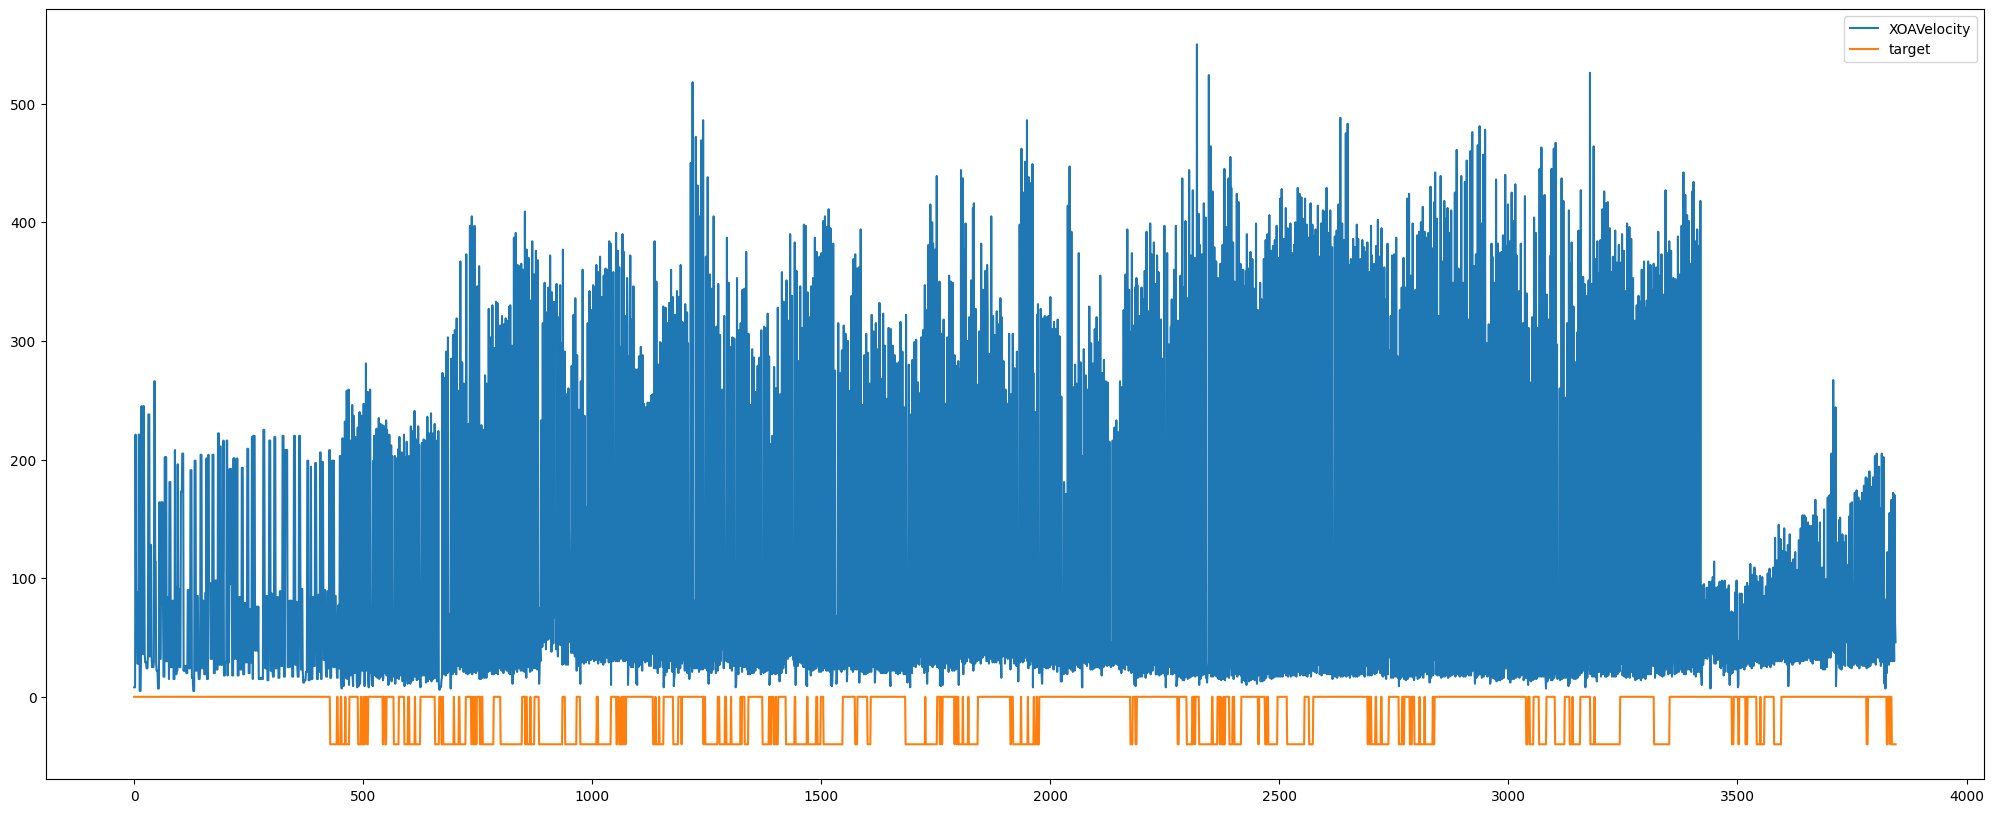

In [ ]:
df1 = df[['XOAVelocity','target']]
df1.target -= 1
df1.target *= 40
plt.figure(figsize=(25,10)) 
plt.plot(df1)
plt.legend(df1.columns)
plt.show()

In [ ]:
filtered_df = df[df['target'] == 1]
max_values = filtered_df.max()
min_values = filtered_df.min()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns)
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,...,ZOAVelocity,ZPeakmg,ZRMSmg,ZKurtosis,ZCrestFactor,ZSkewness,ZDeviation,ZPeaktoPeakDisplacement,target,target2
0,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,...,0.021401,0.025862,0.025785,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,...,0.021401,0.025862,0.025785,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,...,0.021401,0.025862,0.025785,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.396330,0.327189,0.325733,0.049231,0.016142,0.221739,0.185556,0.396552,0.406995,0.300000,...,0.112840,0.028515,0.028598,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.152294,0.520737,0.521173,0.038462,0.002306,0.265217,0.287778,0.155172,0.079491,0.275862,...,0.258755,0.238727,0.238631,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,0.097248,0.198157,0.198697,0.027912,0.125475,0.265217,0.014444,0.068966,0.084261,0.124138,...,0.293774,0.287135,0.286920,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3842,0.045872,0.163594,0.162866,0.030110,0.162914,0.269565,0.207222,0.051724,0.049285,0.115517,...,0.184825,0.086207,0.086263,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3843,0.302752,0.361751,0.361564,0.046154,0.126967,0.269565,0.126111,0.379310,0.413355,0.360345,...,0.883268,0.076923,0.076887,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3844,0.106422,0.377880,0.377850,0.143736,0.412778,0.291304,0.323889,0.137931,0.287758,0.718966,...,0.354086,0.132626,0.132677,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
frames = df[['XOAVelocity',	'XPeakmg',	'XRMSmg',	'XKurtosis',	'XCrestFactor',	'XSkewness'	,'XDeviation',	'XPeaktoPeakDisplacement',
           'YOAVelocity',	'YPeakmg',	'YRMSmg',	'YKurtosis',	'YCrestFactor',	'YSkewness'	,'YDeviation',	'YPeaktoPeakDisplacement',
           'ZOAVelocity',	'ZPeakmg',	'ZRMSmg',	'ZKurtosis',	'ZCrestFactor',	'ZSkewness'	,'ZDeviation',	'ZPeaktoPeakDisplacement']].values
labels = df[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=50 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

2692
1154
2692
1154


In [ ]:
seperated_df = pd.DataFrame()
def plotUsingAutoEncoder(model,df):
    denoised_all = []

    for _,frame in df.iterrows():
        row_array = frame.values[:24]

        generated_data = generator(np.array([row_array]), training=False)

        values = generated_data.numpy()
        denoised_all.append(values[0])


    separated_XOAVelocity = [x[0] for x in denoised_all]
    separated_XPeakmg = [x[1] for x in denoised_all]
    separated_XRMSmg = [x[2] for x in denoised_all]
    separated_XKurtosis = [x[3] for x in denoised_all]
    separated_XCrestFactor = [x[4] for x in denoised_all]
    separated_XSkewness = [x[5] for x in denoised_all]
    separated_XDeviation = [x[6] for x in denoised_all]
    separated_XPeaktoPeakDisplacement = [x[7] for x in denoised_all]
    separated_YOAVelocity = [x[8] for x in denoised_all]
    separated_YPeakmg = [x[9] for x in denoised_all]
    separated_YRMSmg = [x[10] for x in denoised_all]
    separated_YKurtosis = [x[11] for x in denoised_all]
    separated_YCrestFactor = [x[12] for x in denoised_all]
    separated_YSkewness = [x[13] for x in denoised_all]
    separated_YDeviation = [x[14] for x in denoised_all]
    separated_YPeaktoPeakDisplacement = [x[15] for x in denoised_all]
    separated_ZOAVelocity = [x[16] for x in denoised_all]
    separated_ZPeakmg = [x[17] for x in denoised_all]
    separated_ZRMSmg = [x[18] for x in denoised_all]
    separated_ZKurtosis = [x[19] for x in denoised_all]
    separated_ZCrestFactor = [x[20] for x in denoised_all]
    separated_ZSkewness = [x[21] for x in denoised_all]
    separated_ZDeviation = [x[22] for x in denoised_all]
    separated_ZPeaktoPeakDisplacement = [x[23] for x in denoised_all]
    
    seperated_df['XOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['XOAVelocity']) 
    seperated_df['XPeakmg'] = pd.DataFrame(separated_XPeakmg, columns=['XPeakmg'])
    seperated_df['XRMSmg'] = pd.DataFrame(separated_XRMSmg, columns=['XRMSmg']) 
    seperated_df['XKurtosis'] = pd.DataFrame(separated_XKurtosis, columns=['XKurtosis']) 
    seperated_df['XCrestFactor'] = pd.DataFrame(separated_XCrestFactor, columns=['XCrestFactor']) 
    seperated_df['XSkewness'] = pd.DataFrame(separated_XSkewness, columns=['XSkewness']) 
    seperated_df['XDeviation'] = pd.DataFrame(separated_XDeviation, columns=['XDeviation']) 
    seperated_df['XPeaktoPeakDisplacement'] = pd.DataFrame(separated_XPeaktoPeakDisplacement, columns=['XPeaktoPeakDisplacement']) 
    seperated_df['YOAVelocity'] = pd.DataFrame(separated_YOAVelocity, columns=['YOAVelocity']) 
    seperated_df['YPeakmg'] = pd.DataFrame(separated_YPeakmg, columns=['YPeakmg'])
    seperated_df['YRMSmg'] = pd.DataFrame(separated_YRMSmg, columns=['YRMSmg']) 
    seperated_df['YKurtosis'] = pd.DataFrame(separated_YKurtosis, columns=['YKurtosis']) 
    seperated_df['YCrestFactor'] = pd.DataFrame(separated_YCrestFactor, columns=['YCrestFactor']) 
    seperated_df['YSkewness'] = pd.DataFrame(separated_YSkewness, columns=['YSkewness']) 
    seperated_df['YDeviation'] = pd.DataFrame(separated_YDeviation, columns=['YDeviation']) 
    seperated_df['YPeaktoPeakDisplacement'] = pd.DataFrame(separated_YPeaktoPeakDisplacement, columns=['YPeaktoPeakDisplacement']) 
    seperated_df['ZOAVelocity'] = pd.DataFrame(separated_ZOAVelocity, columns=['ZOAVelocity']) 
    seperated_df['ZPeakmg'] = pd.DataFrame(separated_ZPeakmg, columns=['ZPeakmg'])
    seperated_df['ZRMSmg'] = pd.DataFrame(separated_ZRMSmg, columns=['ZRMSmg']) 
    seperated_df['ZKurtosis'] = pd.DataFrame(separated_ZKurtosis, columns=['ZKurtosis']) 
    seperated_df['ZCrestFactor'] = pd.DataFrame(separated_ZCrestFactor, columns=['ZCrestFactor']) 
    seperated_df['ZSkewness'] = pd.DataFrame(separated_ZSkewness, columns=['ZSkewness']) 
    seperated_df['ZDeviation'] = pd.DataFrame(separated_ZDeviation, columns=['ZDeviation']) 
    seperated_df['ZPeaktoPeakDisplacement'] = pd.DataFrame(separated_ZPeaktoPeakDisplacement, columns=['ZPeaktoPeakDisplacement']) 

    
    noise = df[['XOAVelocity']].values.flatten()
    seperated = seperated_df[['XOAVelocity']].values.flatten()

    plt.figure(figsize=(20,5)) 
    plt.plot(noise)
    plt.plot(seperated, color="red")
    plt.legend(labels=["Input", "Reconstruction" ])
    plt.show()


In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(24,)),
        tf.keras.layers.Reshape((24, 1)),  # Add a Reshape layer to prepare input for Conv1D  
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((24, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=24, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(16, activation="LeakyReLU"),
      tf.keras.layers.Dense(24, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator_optimizer = tf.keras.optimizers.Adam()
discriminator_optimizer = tf.keras.optimizers.Adam()

In [ ]:
def train_step(train_data, train_labels):
    gen_loss_epoch = 0.0
    disc_loss_epoch = 0.0
    disc_accuracy_epoch = 0.0

    for i in range(len(train_labels)):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            output = generator(np.array([train_data[i]]), training=True)
            disc_output = discriminator(np.array(output), training=True)

            mae = losses.MeanAbsoluteError()
            gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]

            disc_loss = losses.BinaryCrossentropy(from_logits=False)(tf.expand_dims(train_labels[i], axis=0), disc_output)
            disc_accuracy = tf.reduce_mean(tf.keras.metrics.binary_accuracy(train_labels[i], disc_output))
            

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        gen_loss_epoch += gen_loss
        disc_loss_epoch += disc_loss
        disc_accuracy_epoch += disc_accuracy

    gen_loss_epoch /= len(train_labels)
    disc_loss_epoch /= len(train_labels)
    disc_accuracy_epoch /= len(train_labels)

    return gen_loss_epoch, disc_loss_epoch, disc_accuracy_epoch


In [ ]:
max_epochs = 300
gen_losses = []
disc_losses = []
disc_accuracies = []

for epoch in range(max_epochs):
    print("Epoch " + str(epoch) + " Starting")

    gen_loss_epoch, disc_loss_epoch, disc_accuracy_epoch = train_step(train_data, train_labels)

    disc_accuracies.append(disc_accuracy_epoch)
    gen_losses.append(gen_loss_epoch)
    disc_losses.append(disc_loss_epoch)

    print("Epoch " + str(epoch) + " Generator Loss: " + str(gen_loss_epoch) + " - Discriminator Loss: " + str(disc_loss_epoch) + " - Discriminator Accuracy: " + str(disc_accuracy_epoch))


Epoch 0 Starting
Epoch 0 Generator Loss: tf.Tensor(0.042224854, shape=(), dtype=float32) - Discriminator Loss: tf.Tensor(0.49870053, shape=(), dtype=float32) - Discriminator Accuracy: tf.Tensor(0.80973256, shape=(), dtype=float32)
Epoch 1 Starting
Epoch 1 Generator Loss: tf.Tensor(0.026664363, shape=(), dtype=float32) - Discriminator Loss: tf.Tensor(0.49540588, shape=(), dtype=float32) - Discriminator Accuracy: tf.Tensor(0.810104, shape=(), dtype=float32)
Epoch 2 Starting
Epoch 2 Generator Loss: tf.Tensor(0.020528011, shape=(), dtype=float32) - Discriminator Loss: tf.Tensor(0.4922472, shape=(), dtype=float32) - Discriminator Accuracy: tf.Tensor(0.80973256, shape=(), dtype=float32)
Epoch 3 Starting
Epoch 3 Generator Loss: tf.Tensor(0.01977306, shape=(), dtype=float32) - Discriminator Loss: tf.Tensor(0.49090108, shape=(), dtype=float32) - Discriminator Accuracy: tf.Tensor(0.80898964, shape=(), dtype=float32)
Epoch 4 Starting
Epoch 4 Generator Loss: tf.Tensor(0.01883317, shape=(), dtype=f

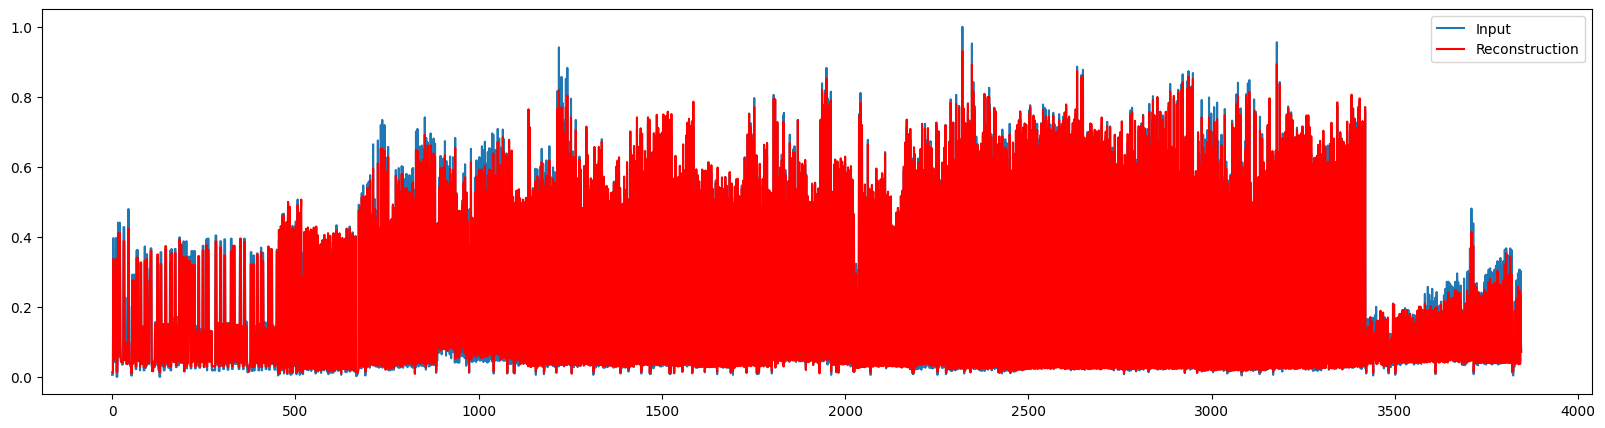

In [ ]:
plotUsingAutoEncoder(generator,df)

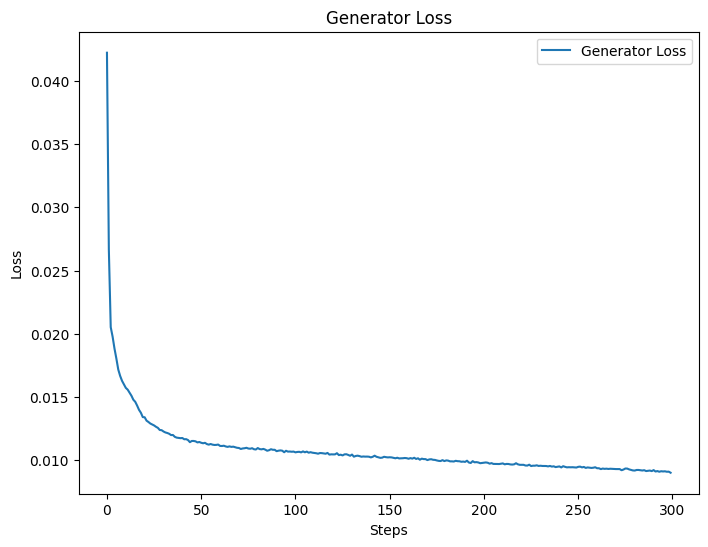

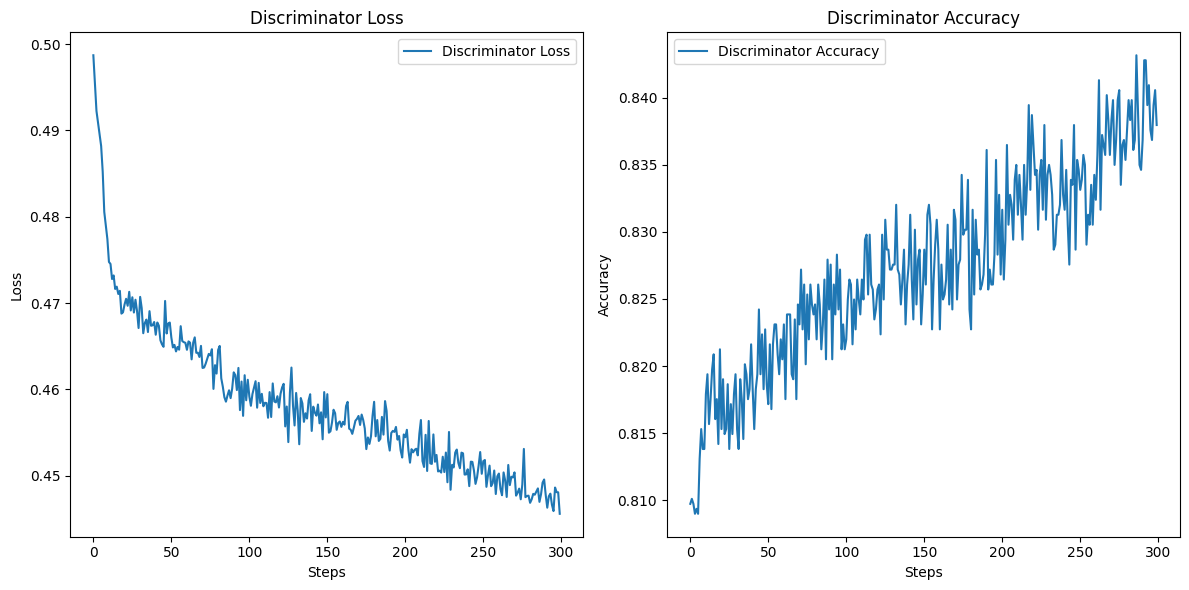

In [ ]:
# Plot Generator Loss
plt.figure(figsize=(8, 6))
plt.plot(gen_losses, label='Generator Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Generator Loss')
plt.legend()
plt.show()
 
# Plot Discriminator Loss and Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(disc_losses, label='Discriminator Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Discriminator Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(disc_accuracies, label='Discriminator Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Discriminator Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# test generator
generator_output = generator.predict(test_data)
generator_loss = np.mean(np.abs(test_data - generator_output))

# test discriminator 
discriminator_output = discriminator.predict(generator_output)
discriminator_loss = tf.keras.losses.binary_crossentropy(test_labels, discriminator_output, from_logits=False)
discriminator_accuracy = accuracy_score(test_labels, np.round(discriminator_output))

37/37 [==============================] - 0s 2ms/step


In [ ]:
print("Generator Loss on Testing Data: ", generator_loss)
print("Discriminator Loss on Testing Data: ", np.mean(discriminator_loss))
print("Discriminator Accuracy on Testing Data: ", discriminator_accuracy)

Generator Loss on Testing Data:  0.012671987370268357
Discriminator Loss on Testing Data:  0.42351735
Discriminator Accuracy on Testing Data:  0.8233102253032929


In [ ]:
#Calculate SNR Value

noise =[]
generated = seperated_df['XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(mixed[i] - original[i])

snr = (np.mean(np.square(generated))/np.mean(np.square(noise)))

In [ ]:
print("SNR value: ", snr)

SNR value:  10.892026062909125


In [ ]:
seperated_csv = pd.DataFrame({column: ((seperated_df[column] * (max_values[column] - min_values[column])) + min_values[column]) for column in seperated_df.columns})

In [ ]:
seperated_csv.to_csv('seperated_file.csv')